In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/akhtyamovpavel/Science/BioInfo/data/MouseDataset/master_cicero_conns.txt', sep='\t')

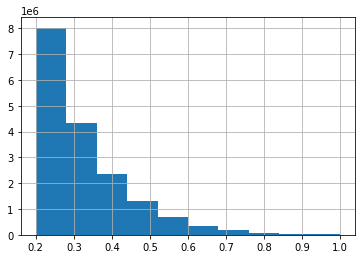

In [3]:
df['coaccess'].hist()

In [4]:
len(df[df.coaccess > 0.8].Peak1.unique())

43103

In [5]:
from scale.dataset import read_mtx

In [6]:
count, feature, barcode = read_mtx('../data/MouseAtlasPreprocessed/mouse_atlas/')
cell_types = labels[1].unique()
cell_barcodes = {}
for cell_type in cell_types:
    cell_barcodes[cell_type] = list(labels[labels[1] == cell_type].index)
    
for cell_type, barcode in cell_barcodes.items():
    cell_by_feature = np.asarray(count[barcode].sum(axis=0)).flatten()
    output = pd.DataFrame(feature[np.argsort(cell_by_feature)[-20000:]])
    output['chr'] = output[0].apply(lambda x: x.split('_')[0])
    output['start'] = output[0].apply(lambda x: x.split('_')[1])
    output['end'] = output[0].apply(lambda x: x.split('_')[2])
    output.drop(0, axis=1).to_csv(
        os.path.join('mouse_cicero_pipeline/raw_beds_top_20000', f'{cell_type.replace(" ", "_").replace("/", "_")}.bed'),
        header=None,
        index=None,
        sep='\t'
    )

In [92]:
import os

In [68]:
import matplotlib.pyplot as plt

array([305588, 305594, 315221, ..., 351886, 294411, 310702])

In [96]:
!mkdir -p mouse_cicero_pipeline/raw_beds_top_20000

In [91]:
output.drop(0, axis=1).to_csv(f'{cell_type.replace(" ", "_").replace("/", "_")}.bed', header=None, index=None, sep='\t')

,chr,start,end
0,chr1,3002478,3002968
1,chr1,3084739,3085712
2,chr1,3103576,3104022
3,chr1,3106871,3107210
4,chr1,3108932,3109158
...,...,...,...
358637,chrY,609312,609797
358638,chrY,621772,623366
358639,chrY,629871,630911
358640,chrY,631222,631480


KeyboardInterrupt: 

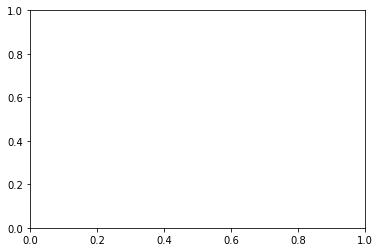

In [59]:
plt.hist(cell_by_feature)

In [31]:
import numpy as np
np.diff(cell_barcodes['Hematopoietic progenitors']).max()

1

In [22]:
labels = pd.read_csv('../data/MouseAtlasPreprocessed/mouse_atlas/labels.txt', sep='\t', header=None)

In [23]:
labels

,0,1
0,AGCGATAGAACGAATTCGCCTCCGACGGCAGGACGT,Hematopoietic progenitors
1,AGCGATAGAACGAATTCGTTGGTAGTCGATAGAGGC,Hematopoietic progenitors
2,AGCGATAGAACGCGCAGAAAGCTAGGTTAGGCGAAG,Hematopoietic progenitors
3,AGCGATAGAACGCGCAGAAAGCTAGGTTGTACTGAC,Hematopoietic progenitors
4,AGCGATAGAACGCGCAGAAGCTTATAGGATAGAGGC,Hematopoietic progenitors
...,...,...
81168,TCCGGAGACTCAATTAGTCCATCGTTCCTATAGCCT,Endothelial II cells
81169,TAATGCGCTATAATAGTTGATGCAGTTCATAGAGGC,Endothelial II cells
81170,ATTACTCGTCAATCTCCTGTCTGCAATCTAATCTTA,Endothelial II cells
81171,ATTACTCGAGTTCTCATGAGGCGAGAGCCAGGACGT,Endothelial II cells


In [16]:
count[0, 1]

0.0

In [8]:
barcode.shape

(81173,)

In [9]:
import numpy as np

In [10]:
set_filtered = set(df[df.coaccess > 0.8].Peak1.unique())

In [11]:
indices = []
filtered_feature = []
for index, element in enumerate(feature):
    if element in set_filtered:
        indices.append(index)
        filtered_feature.append(element)

In [12]:
len(filtered_feature)

43103

In [13]:
filtered_count = count[:, indices]

In [23]:
filtered_count.T

<43103x81173 sparse matrix of type '<class 'numpy.float32'>'
	with 82374471 stored elements in Compressed Sparse Column format>

In [19]:
len(filtered_feature)

43103

In [20]:
peaks_df = pd.DataFrame(filtered_feature)

In [21]:
peaks_df

,0
0,chr1_3175009_3175727
1,chr1_3175797_3176314
2,chr1_3349783_3350404
3,chr1_3350784_3351508
4,chr1_3542557_3542899
...,...
43098,chrX_166418652_166420035
43099,chrY_451796_452329
43100,chrY_452646_452987
43101,chrY_590064_590392


In [22]:
peaks_df.to_csv('mouse_atlas_cicero/peaks.txt', index=None, columns=None)

In [11]:
output_dataframe = pd.DataFrame(filtered_count.toarray(), index=barcode, columns=filtered_feature)

In [14]:
from scipy.io import mmwrite

In [16]:
mmwrite('mouse_atlas_cicero/count_matrix.mtx', filtered_count.T)

In [50]:
output_dataframe

,chr1_3175009_3175727,chr1_3175797_3176314,chr1_3349783_3350404,chr1_3350784_3351508,chr1_3542557_3542899,chr1_3543104_3543794,chr1_3575901_3576436,chr1_3576535_3576855,chr1_3905789_3906055,chr1_3906310_3906587,...,chrX_166410541_166411550,chrX_166411693_166412078,chrX_166412859_166413381,chrX_166413546_166414204,chrX_166416270_166418640,chrX_166418652_166420035,chrY_451796_452329,chrY_452646_452987,chrY_590064_590392,chrY_590469_590895
AGCGATAGAACGAATTCGCCTCCGACGGCAGGACGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGCGATAGAACGAATTCGTTGGTAGTCGATAGAGGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGCGATAGAACGCGCAGAAAGCTAGGTTAGGCGAAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGCGATAGAACGCGCAGAAAGCTAGGTTGTACTGAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGCGATAGAACGCGCAGAAGCTTATAGGATAGAGGC,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCCGGAGACTCAATTAGTCCATCGTTCCTATAGCCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TAATGCGCTATAATAGTTGATGCAGTTCATAGAGGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATTACTCGTCAATCTCCTGTCTGCAATCTAATCTTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATTACTCGAGTTCTCATGAGGCGAGAGCCAGGACGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
output_dataframe.T.to_csv('mouse_atlas_cicero.csv')

In [31]:
df = pd.read_csv('../data/MouseAtlasPreprocessed/mouse_atlas/labels.txt', sep='\t', header=None, index_col=0)

In [33]:
df.index

Index(['AGCGATAGAACGAATTCGCCTCCGACGGCAGGACGT',
       'AGCGATAGAACGAATTCGTTGGTAGTCGATAGAGGC',
       'AGCGATAGAACGCGCAGAAAGCTAGGTTAGGCGAAG',
       'AGCGATAGAACGCGCAGAAAGCTAGGTTGTACTGAC',
       'AGCGATAGAACGCGCAGAAGCTTATAGGATAGAGGC',
       'AGCGATAGAACGCGCAGAGATTAGATGAGGCTCTGA',
       'AGCGATAGAACGCGCAGATGCTACGGTCAGGCGAAG',
       'AGCGATAGAACGCGCAGATGGCGTAGAAGGCTCTGA',
       'AGCGATAGAACGCGCAGATGGCGTAGAATAATCTTA',
       'AGCGATAGAACGCGCAGATTCAGCTTGGGTACTGAC',
       ...
       'CGCTCATTAGTTCTCATGGGTAATAATGTAATCTTA',
       'TCCGGAGATCTATCGCTGCCGACTCCAAGGCTCTGA',
       'TAATGCGCTAGTAAGCCGCCATCGTTCCTATAGCCT',
       'GAGATTCCTAGGTAACTTTCAAGATAGTTATAGCCT',
       'GAGATTCCCCGTATGATTGTAGACCTGGGGCTCTGA',
       'TCCGGAGACTCAATTAGTCCATCGTTCCTATAGCCT',
       'TAATGCGCTATAATAGTTGATGCAGTTCATAGAGGC',
       'ATTACTCGTCAATCTCCTGTCTGCAATCTAATCTTA',
       'ATTACTCGAGTTCTCATGAGGCGAGAGCCAGGACGT',
       'ATTCAGAAATTCTTAGCTCAATGAGTCCTATAGCCT'],
      dtype='object', name=0, length=81173)

In [34]:
df[1]

0
AGCGATAGAACGAATTCGCCTCCGACGGCAGGACGT    Hematopoietic progenitors
AGCGATAGAACGAATTCGTTGGTAGTCGATAGAGGC    Hematopoietic progenitors
AGCGATAGAACGCGCAGAAAGCTAGGTTAGGCGAAG    Hematopoietic progenitors
AGCGATAGAACGCGCAGAAAGCTAGGTTGTACTGAC    Hematopoietic progenitors
AGCGATAGAACGCGCAGAAGCTTATAGGATAGAGGC    Hematopoietic progenitors
                                                  ...            
TCCGGAGACTCAATTAGTCCATCGTTCCTATAGCCT         Endothelial II cells
TAATGCGCTATAATAGTTGATGCAGTTCATAGAGGC         Endothelial II cells
ATTACTCGTCAATCTCCTGTCTGCAATCTAATCTTA         Endothelial II cells
ATTACTCGAGTTCTCATGAGGCGAGAGCCAGGACGT         Endothelial II cells
ATTCAGAAATTCTTAGCTCAATGAGTCCTATAGCCT         Endothelial II cells
Name: 1, Length: 81173, dtype: object